In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('testing_dataset.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,CT,tract_name,total_population,median_age,total_households,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,...,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city
0,17031010100,Census Tract 101,4444,33.7,883,33750,865.0,250000.0,0.545005,0.516515,...,0.308836,0.499587,0.026012,0.063584,35.930233,0,0,0,Non-Starbucks,chicago
1,17031010201,Census Tract 102.01,7197,34.8,1587,40841,989.0,150500.0,0.455468,0.493899,...,0.512508,0.299878,0.037218,0.045760,39.153873,0,0,0,Non-Starbucks,chicago
2,17031010202,Census Tract 102.02,2487,36.7,417,36563,943.0,168300.0,0.494170,0.495525,...,0.467046,0.415785,0.034174,0.042311,31.476977,5422,3307,0,Non-Starbucks,chicago
3,17031010300,Census Tract 103,6413,42.1,1051,36870,948.0,174400.0,0.505068,0.472059,...,0.481321,0.372028,0.010497,0.061439,40.189873,1518,1066,0,Non-Starbucks,chicago
4,17031010400,Census Tract 104,5411,23.8,720,39634,979.0,226200.0,0.609499,0.318072,...,0.191328,0.341116,0.027289,0.077016,33.598616,0,0,0,Non-Starbucks,chicago


In [3]:
## Check NA's
df.isnull().sum()

CT                      0
tract_name              0
total_population        0
median_age              0
total_households        0
median_hh_income        0
median_rent             0
median_home_value       0
percent_workers         0
percent_leave_7_9       0
perc_hs_dipl            0
perc_bach_deg           0
perc_masters_deg        0
perc_walk_to_work       0
perc_car_to_work        0
perc_pub_tran           0
perc_bicycle_to_work    0
perc_work_from_home     0
time_to_work            0
weekday_tran            0
weekend_tran            0
star_count              0
starbucks_flag          0
city                    0
dtype: int64

In [4]:
df['starbucks_flag'].value_counts()

Non-Starbucks    1231
Starbucks         242
Name: starbucks_flag, dtype: int64

In [5]:
for i in range(len(df)):
    wd = df.loc[i,'weekday_tran']
    wk = df.loc[i,'weekend_tran']
    m = round(np.average([wd,wk], weights=[5,2]),0)
    df.loc[i,'tran_mean'] = m 

In [6]:
df.head(7)

,CT,tract_name,total_population,median_age,total_households,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,...,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean
0,17031010100,Census Tract 101,4444,33.7,883,33750,865.0,250000.0,0.545005,0.516515,...,0.499587,0.026012,0.063584,35.930233,0,0,0,Non-Starbucks,chicago,0.0
1,17031010201,Census Tract 102.01,7197,34.8,1587,40841,989.0,150500.0,0.455468,0.493899,...,0.299878,0.037218,0.045760,39.153873,0,0,0,Non-Starbucks,chicago,0.0
2,17031010202,Census Tract 102.02,2487,36.7,417,36563,943.0,168300.0,0.494170,0.495525,...,0.415785,0.034174,0.042311,31.476977,5422,3307,0,Non-Starbucks,chicago,4818.0
3,17031010300,Census Tract 103,6413,42.1,1051,36870,948.0,174400.0,0.505068,0.472059,...,0.372028,0.010497,0.061439,40.189873,1518,1066,0,Non-Starbucks,chicago,1389.0
4,17031010400,Census Tract 104,5411,23.8,720,39634,979.0,226200.0,0.609499,0.318072,...,0.341116,0.027289,0.077016,33.598616,0,0,0,Non-Starbucks,chicago,0.0
5,17031010501,Census Tract 105.01,4081,37.1,586,31985,945.0,184200.0,0.636609,0.435335,...,0.464588,0.023480,0.071209,36.955850,0,0,0,Non-Starbucks,chicago,0.0
6,17031010502,Census Tract 105.02,2631,31.6,320,33721,957.0,217800.0,0.684531,0.496391,...,0.424764,0.019989,0.059411,36.097340,0,0,1,Starbucks,chicago,0.0


In [7]:
ct = df[['starbucks_flag','city']]
ct.groupby(['city','starbucks_flag']).size()

city          starbucks_flag
chicago       Non-Starbucks     709
              Starbucks          92
manhattan     Non-Starbucks     171
              Starbucks         117
philadelphia  Non-Starbucks     351
              Starbucks          33
dtype: int64

In [8]:
pd.options.display.float_format = '{:.2f}'.format
dg = df.drop(['CT','star_count'], axis = 1)
dg.groupby(['starbucks_flag','city']).mean()

total_population  median_age  total_households  \
starbucks_flag city                                                           
Non-Starbucks  chicago                3329.63       35.03            700.40   
               manhattan              5789.81       36.71           1139.11   
               philadelphia           4143.72       35.24            840.74   
Starbucks      chicago                4180.80       33.70            795.39   
               manhattan              5673.68       38.36           1076.17   
               philadelphia           3491.21       31.28            504.06   

                             median_hh_income  median_rent  median_home_value  \
starbucks_flag city                                                             
Non-Starbucks  chicago               50102.22      1010.02          233098.73   
               manhattan             68476.35      1447.33          800017.60   
               philadelphia          42465.17       965.77          172321.08   
Starbucks      chicago               83126.59      1384.77          379675.00   
               manhattan            121625.21      2291.79         1104266.77   
               philadelphia          53242.55      1230.45          297387.88   

                             percent_workers  percent_leave_7_9  perc_hs_dipl  \
starbucks_flag city                                                             
Non-Starbucks  chicago                  0.48               0.43          0.15   
               manhattan                0.50               0.49          0.10   
               philadelphia             0.44               0.45          0.20   
Starbucks      chicago                  0.63               0.54          0.07   
               manhattan                0.61               0.56          0.05   
               philadelphia             0.51               0.46          0.11   

                             perc_bach_deg  perc_masters_deg  \
starbucks_flag city                                            
Non-Starbucks  chicago                0.13              0.06   
               manhattan              0.19              0.11   
               philadelphia           0.11              0.05   
Starbucks      chicago                0.27              0.14   
               manhattan              0.32              0.19   
               philadelphia           0.17              0.10   

                             perc_walk_to_work  perc_car_to_work  \
starbucks_flag city                                                
Non-Starbucks  chicago                    0.04              0.55   
               manhattan                  0.16              0.08   
               philadelphia               0.06              0.53   
Starbucks      chicago                    0.13              0.40   
               manhattan                  0.27              0.06   
               philadelphia               0.19              0.37   

                             perc_pub_tran  perc_bicycle_to_work  \
starbucks_flag city                                                
Non-Starbucks  chicago                0.26                  0.01   
               manhattan              0.56                  0.02   
               philadelphia           0.24                  0.02   
Starbucks      chicago                0.30                  0.02   
               manhattan              0.52                  0.02   
               philadelphia           0.17                  0.02   

                             perc_work_from_home  time_to_work  weekday_tran  \
starbucks_flag city                                                            
Non-Starbucks  chicago                      0.04         35.58        376.06   
               manhattan                    0.06         32.35       3554.19   
               philadelphia                 0.03         32.70        643.94   
Starbucks      chicago                      0.06         31.34       3418.88   
               

In [9]:
dg.groupby(['starbucks_flag','city']).median()

total_population  median_age  total_households  \
starbucks_flag city                                                           
Non-Starbucks  chicago                2992.00       34.20            627.00   
               manhattan              5621.00       36.10           1035.00   
               philadelphia           4079.00       34.60            802.00   
Starbucks      chicago                3541.50       33.05            640.00   
               manhattan              5457.00       37.70            950.00   
               philadelphia           3615.00       31.50            508.00   

                             median_hh_income  median_rent  median_home_value  \
starbucks_flag city                                                             
Non-Starbucks  chicago               42910.00       973.00          194500.00   
               manhattan             52986.00      1240.00          829900.00   
               philadelphia          39432.00       943.00          141900.00   
Starbucks      chicago               87854.00      1345.50          380250.00   
               manhattan            123563.00      2267.00          992000.00   
               philadelphia          51250.00      1186.00          239000.00   

                             percent_workers  percent_leave_7_9  perc_hs_dipl  \
starbucks_flag city                                                             
Non-Starbucks  chicago                  0.47               0.42          0.15   
               manhattan                0.51               0.50          0.10   
               philadelphia             0.44               0.45          0.20   
Starbucks      chicago                  0.65               0.58          0.05   
               manhattan                0.61               0.56          0.04   
               philadelphia             0.55               0.53          0.07   

                             perc_bach_deg  perc_masters_deg  \
starbucks_flag city                                            
Non-Starbucks  chicago                0.10              0.04   
               manhattan              0.18              0.10   
               philadelphia           0.08              0.03   
Starbucks      chicago                0.30              0.14   
               manhattan              0.31              0.19   
               philadelphia           0.15              0.08   

                             perc_walk_to_work  perc_car_to_work  \
starbucks_flag city                                                
Non-Starbucks  chicago                    0.03              0.56   
               manhattan                  0.12              0.08   
               philadelphia               0.04              0.53   
Starbucks      chicago                    0.07              0.35   
               manhattan                  0.25              0.06   
               philadelphia               0.14              0.38   

                             perc_pub_tran  perc_bicycle_to_work  \
starbucks_flag city                                                
Non-Starbucks  chicago                0.24                  0.00   
               manhattan              0.60                  0.01   
               philadelphia           0.23                  0.00   
Starbucks      chicago                0.27                  0.02   
               manhattan              0.50                  0.02   
               philadelphia           0.16                  0.00   

                             perc_work_from_home  time_to_work  weekday_tran  \
starbucks_flag city                                                            
Non-Starbucks  chicago                      0.03         35.57          0.00   
               manhattan                    0.05         33.92          0.00   
               philadelphia                 0.02         33.34          0.00   
Starbucks      chicago                      0.06         31.81          0.00   
               

In [10]:
dg.groupby(['starbucks_flag','city']).std()

total_population  median_age  total_households  \
starbucks_flag city                                                           
Non-Starbucks  chicago                1710.37        6.49            384.22   
               manhattan              3072.33        9.72            655.81   
               philadelphia           1809.71        8.29            421.38   
Starbucks      chicago                2626.05        6.90            590.10   
               manhattan              3392.27        6.49            736.89   
               philadelphia           1653.29       11.92            349.37   

                             median_hh_income  median_rent  median_home_value  \
starbucks_flag city                                                             
Non-Starbucks  chicago               27092.76       286.07          131940.01   
               manhattan             47301.44       737.29          438506.78   
               philadelphia          23433.87       289.61          123780.10   
Starbucks      chicago               33831.71       446.64          152816.49   
               manhattan             40847.42       622.54          426110.47   
               philadelphia          31762.95       501.24          205910.78   

                             percent_workers  percent_leave_7_9  perc_hs_dipl  \
starbucks_flag city                                                             
Non-Starbucks  chicago                  0.13               0.12          0.06   
               manhattan                0.16               0.15          0.06   
               philadelphia             0.12               0.13          0.07   
Starbucks      chicago                  0.15               0.13          0.05   
               manhattan                0.11               0.11          0.04   
               philadelphia             0.17               0.19          0.09   

                             perc_bach_deg  perc_masters_deg  \
starbucks_flag city                                            
Non-Starbucks  chicago                0.10              0.05   
               manhattan              0.11              0.08   
               philadelphia           0.09              0.05   
Starbucks      chicago                0.11              0.06   
               manhattan              0.08              0.05   
               philadelphia           0.11              0.08   

                             perc_walk_to_work  perc_car_to_work  \
starbucks_flag city                                                
Non-Starbucks  chicago                    0.05              0.16   
               manhattan                  0.12              0.05   
               philadelphia               0.08              0.19   
Starbucks      chicago                    0.14              0.20   
               manhattan                  0.15              0.03   
               philadelphia               0.16              0.26   

                             perc_pub_tran  perc_bicycle_to_work  \
starbucks_flag city                                                
Non-Starbucks  chicago                0.12                  0.02   
               manhattan              0.17                  0.02   
               philadelphia           0.12                  0.04   
Starbucks      chicago                0.14                  0.02   
               manhattan              0.14                  0.02   
               philadelphia           0.10                  0.03   

                             perc_work_from_home  time_to_work  weekday_tran  \
starbucks_flag city                                                            
Non-Starbucks  chicago                      0.03          5.51       1418.26   
               manhattan                    0.05          9.73       8746.74   
               philadelphia                 0.03          6.90       2557.71   
Starbucks      chicago                      0.03          6.60      10222.26   
               

In [11]:
dg1 = df.drop(['CT','star_count','city'], axis = 1)
dg1.groupby(['starbucks_flag']).mean()

,total_population,median_age,total_households,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,tran_mean
starbucks_flag,,,,,,,,,,,,,,,,,,,,
Non-Starbucks,3903.50,35.32,801.36,50477.02,1058.15,294520.48,0.47,0.44,0.15,0.13,0.07,0.06,0.48,0.30,0.02,0.04,34.31,893.92,762.64,856.41
Starbucks,4808.53,35.62,891.41,97664.46,1802.24,718773.19,0.60,0.54,0.06,0.28,0.16,0.20,0.24,0.39,0.02,0.07,28.73,11840.02,9990.32,11311.54


In [12]:
dg1.groupby(['starbucks_flag']).median()

,total_population,median_age,total_households,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,tran_mean
starbucks_flag,,,,,,,,,,,,,,,,,,,,
Non-Starbucks,3529.00,34.60,720.00,42548.00,980.00,198900.00,0.47,0.44,0.15,0.10,0.04,0.04,0.51,0.27,0.00,0.03,34.64,0.00,0.00,0.00
Starbucks,4141.00,35.10,731.50,100233.00,1770.50,591850.00,0.61,0.56,0.05,0.29,0.17,0.18,0.12,0.40,0.01,0.06,28.72,0.00,0.00,0.00


In [13]:
df[['total_population', 'median_age',
       'total_households', 'median_hh_income', 'median_rent',
       'median_home_value', 'percent_workers', 'percent_leave_7_9',
       'perc_hs_dipl', 'perc_bach_deg', 'perc_masters_deg',
       'perc_walk_to_work', 'perc_car_to_work', 'perc_pub_tran',
       'perc_bicycle_to_work', 'perc_work_from_home', 'time_to_work',
       'weekday_tran', 'weekend_tran','tran_mean']].skew()

total_population        1.24
median_age             -0.41
total_households        1.26
median_hh_income        1.39
median_rent             1.62
median_home_value       2.30
percent_workers        -0.12
percent_leave_7_9      -0.32
perc_hs_dipl            0.19
perc_bach_deg           0.73
perc_masters_deg        0.94
perc_walk_to_work       2.10
perc_car_to_work       -0.25
perc_pub_tran           0.68
perc_bicycle_to_work    3.00
perc_work_from_home     2.49
time_to_work           -1.45
weekday_tran           10.70
weekend_tran           12.34
tran_mean              11.17
dtype: float64

In [14]:
def box_plot(xx):
    plt.subplots(figsize=(12,10))
    plt.subplot(211)
    plt.title(xx)
    sns.boxplot(x="starbucks_flag", y=xx,
            hue="city",
            data=df)
    plt.subplot(212)
    plt.title(xx)
    sns.boxplot(x="starbucks_flag", y=xx,
            data=df)

In [15]:
col_list = ['total_population', 'median_age',
       'total_households', 'median_hh_income', 'median_rent',
       'median_home_value', 'percent_workers', 'percent_leave_7_9',
       'perc_hs_dipl', 'perc_bach_deg', 'perc_masters_deg',
       'perc_walk_to_work', 'perc_car_to_work', 'perc_pub_tran',
       'perc_bicycle_to_work', 'perc_work_from_home', 'time_to_work',
       'weekday_tran', 'weekend_tran','tran_mean']

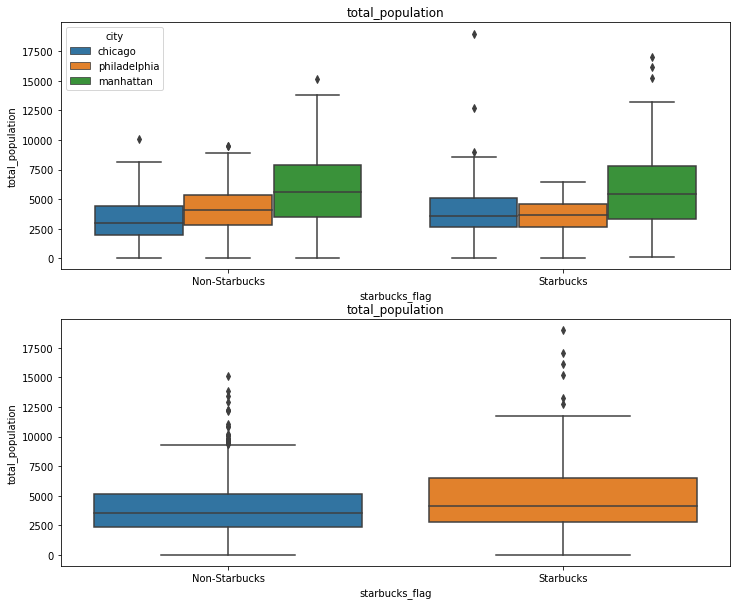

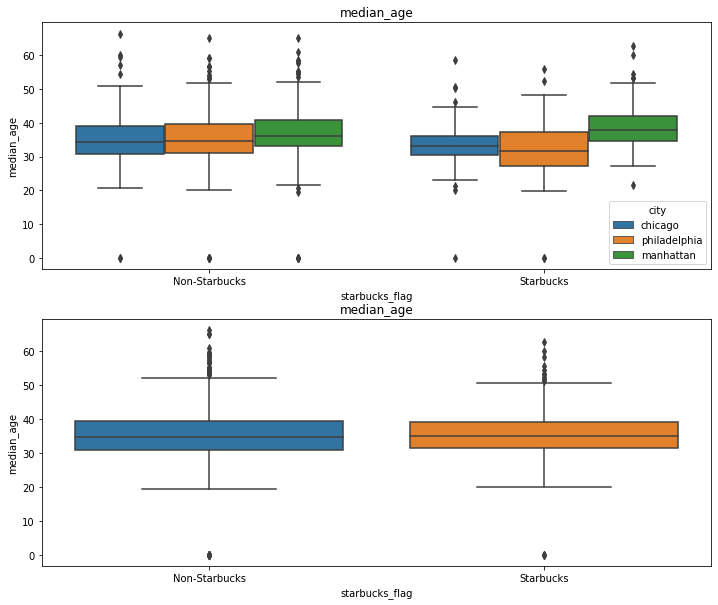

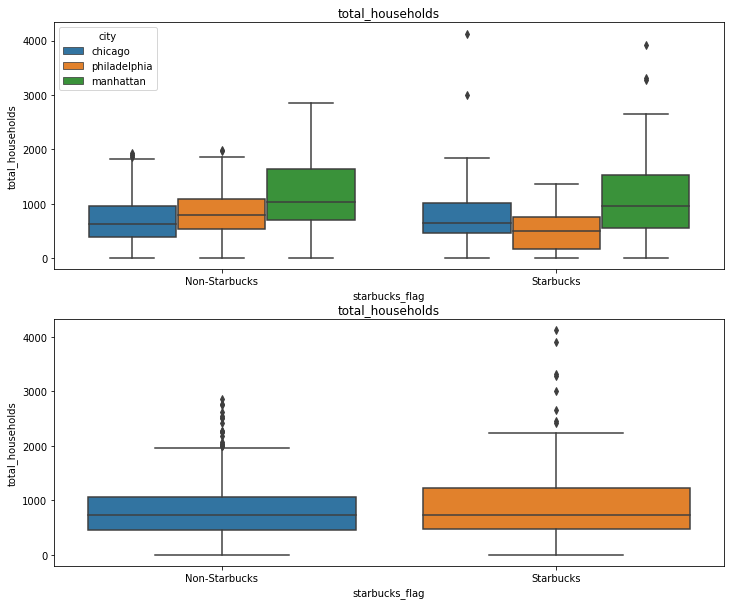

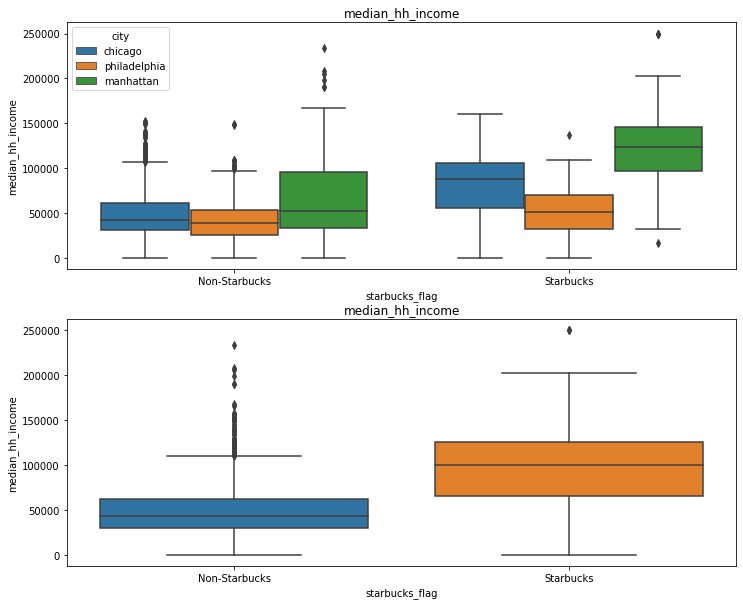

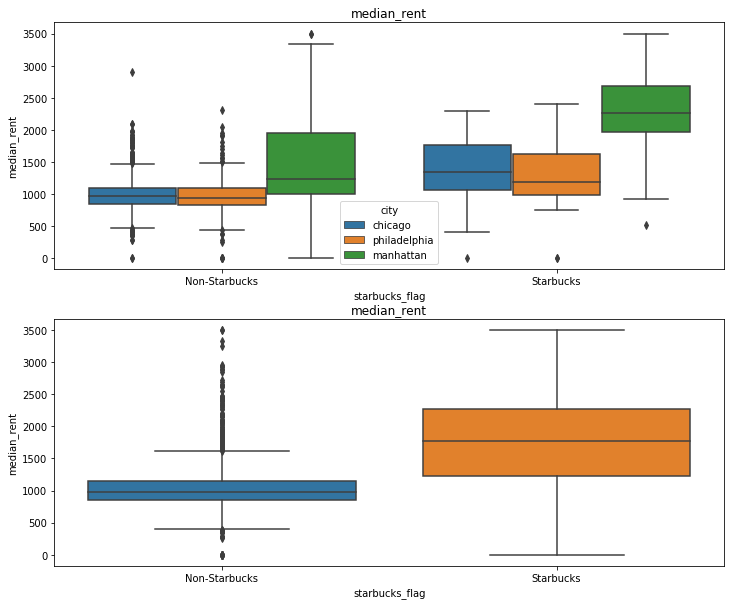

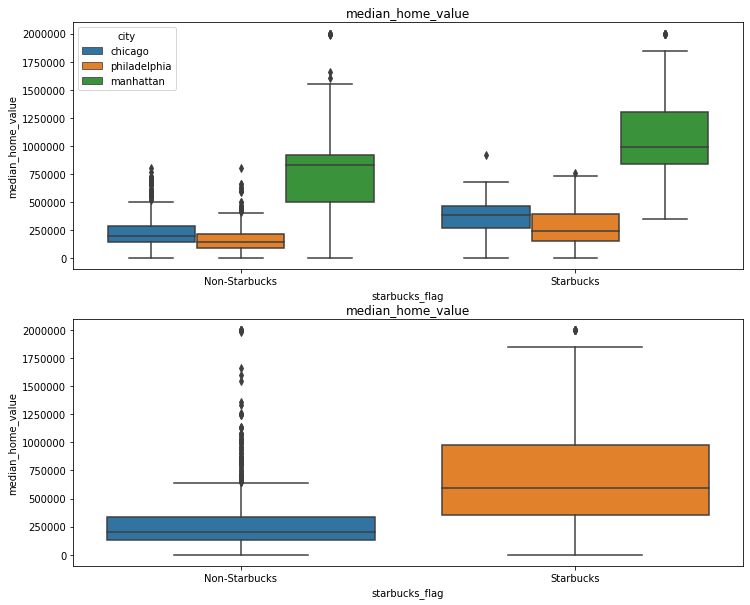

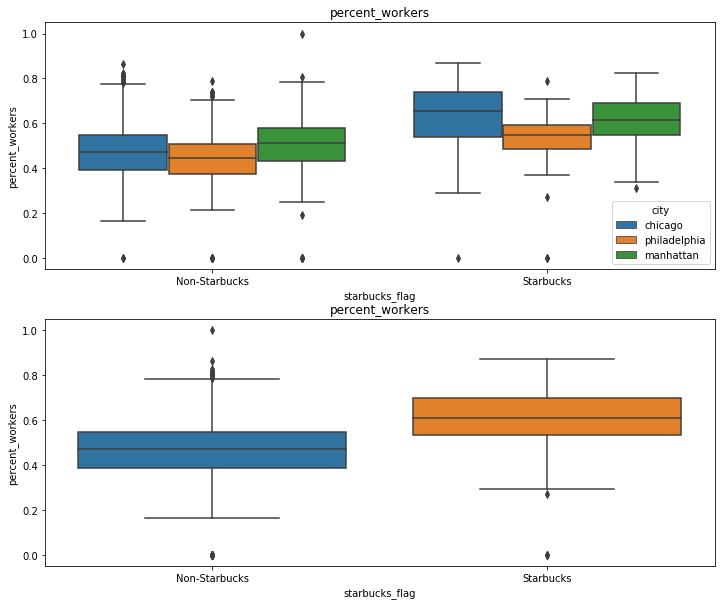

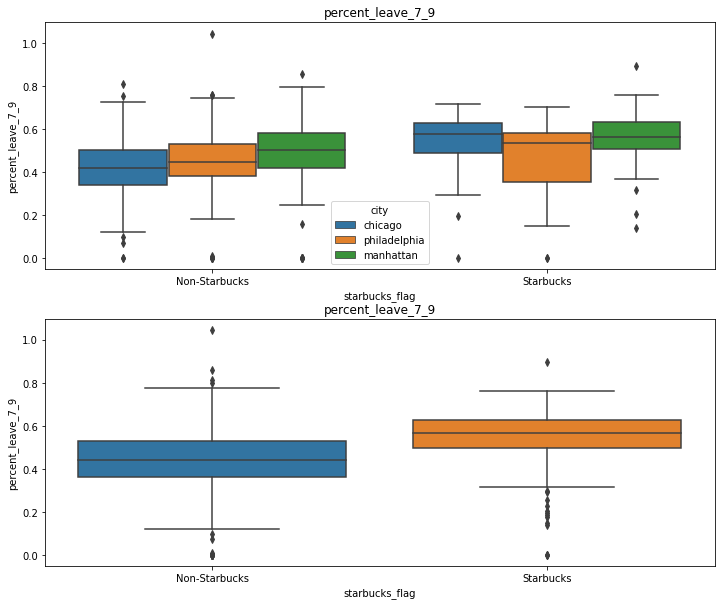

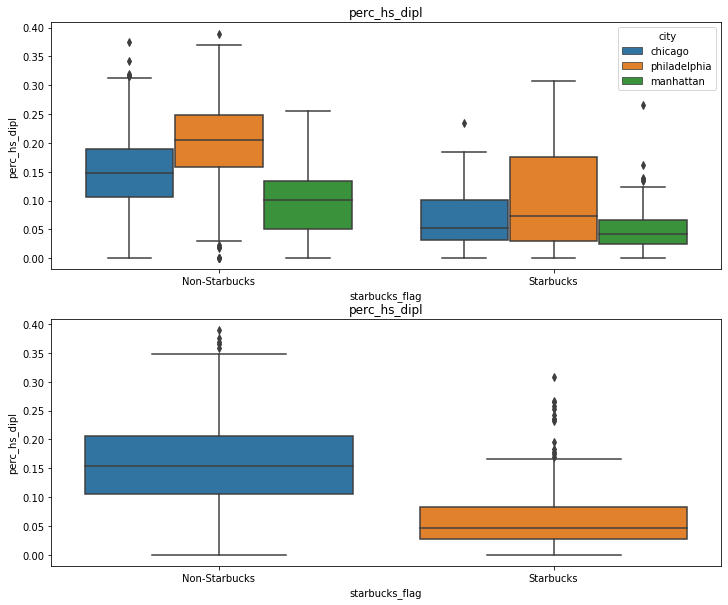

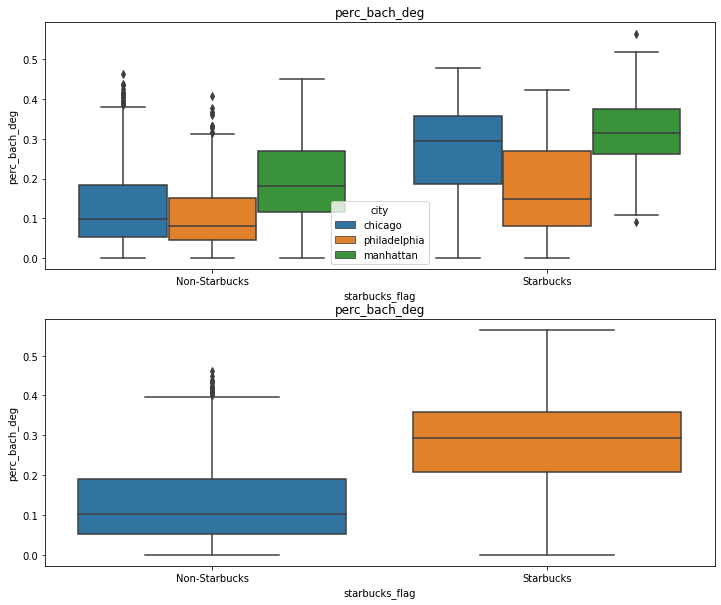

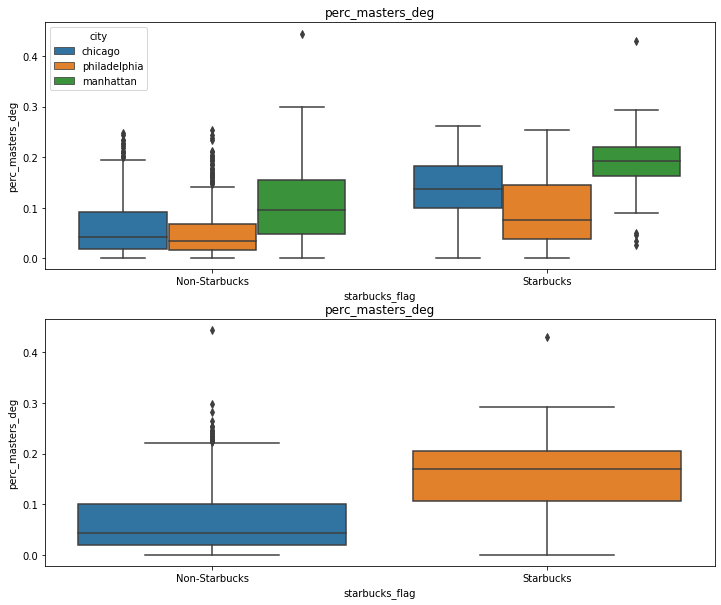

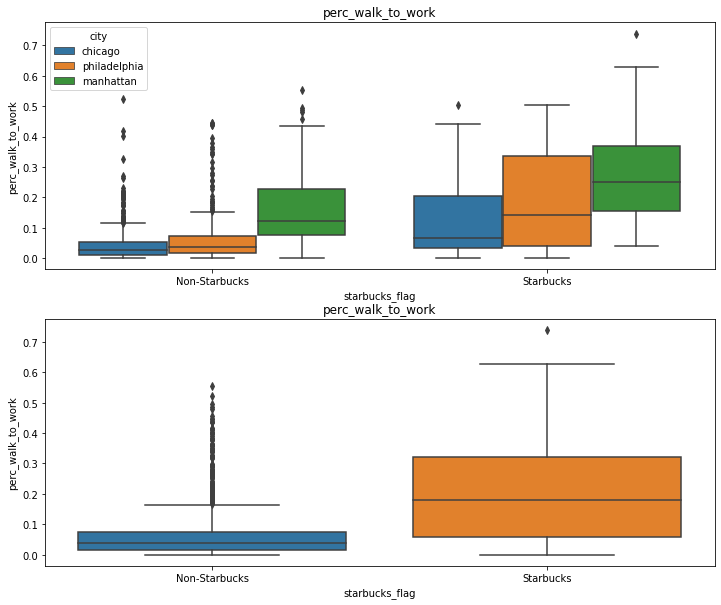

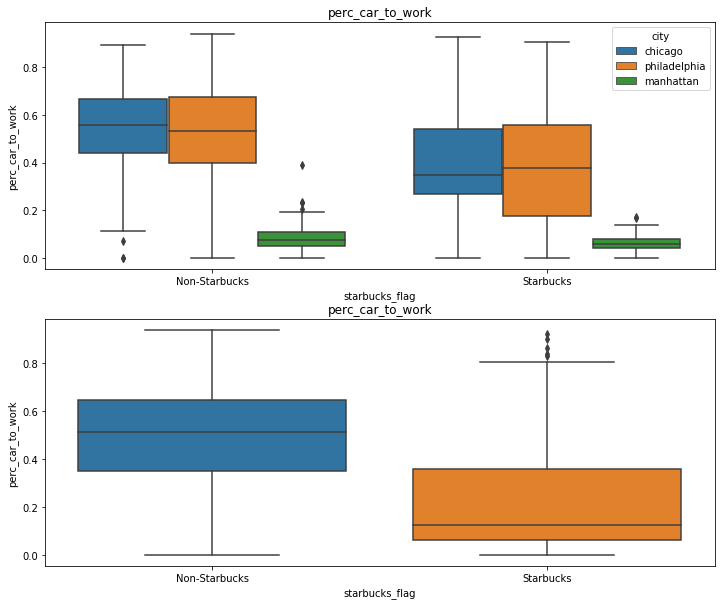

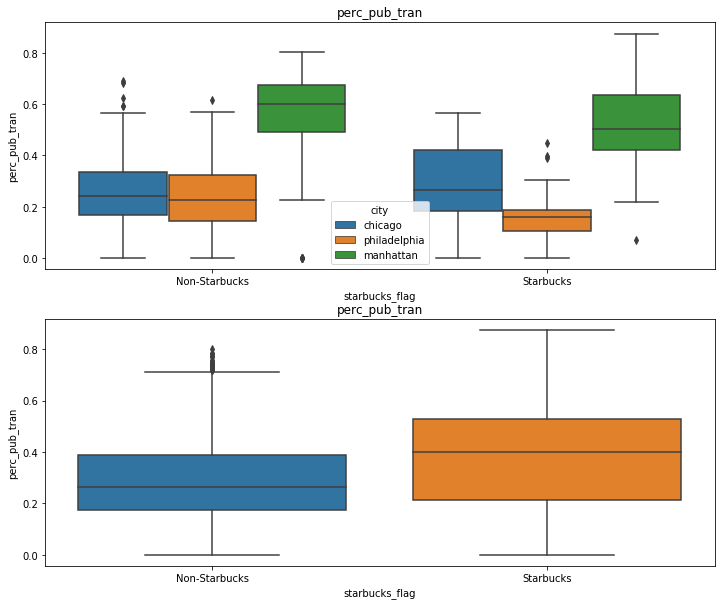

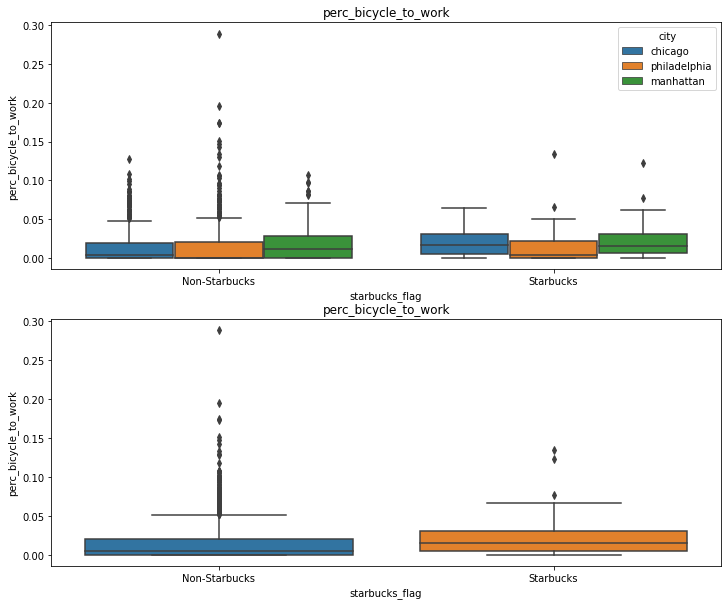

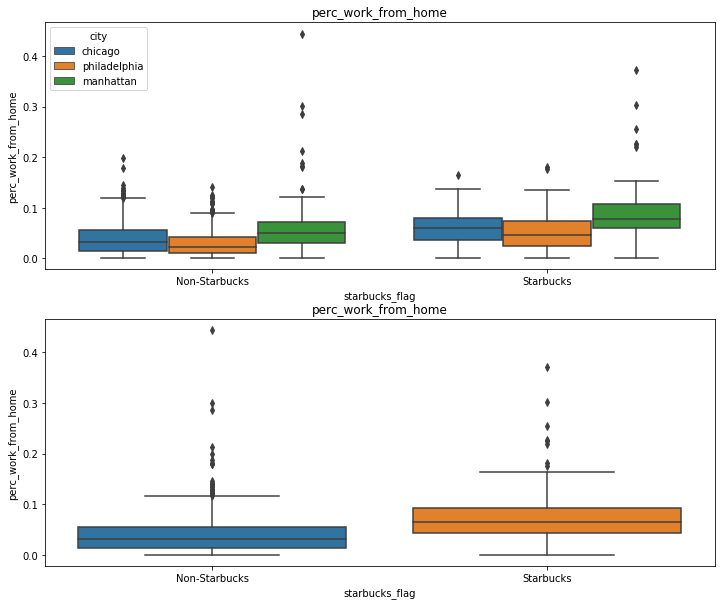

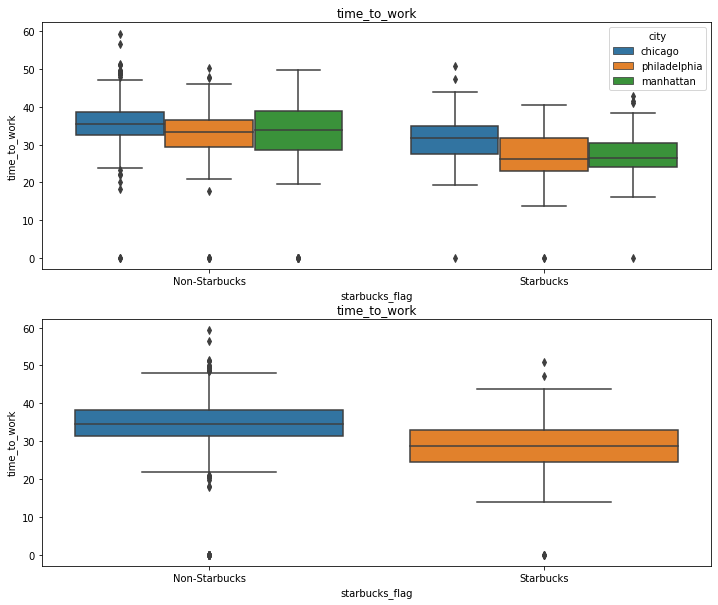

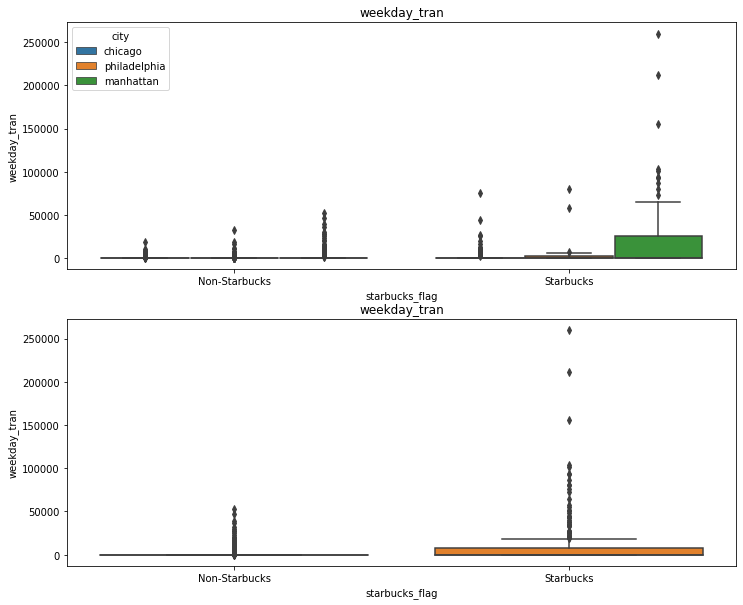

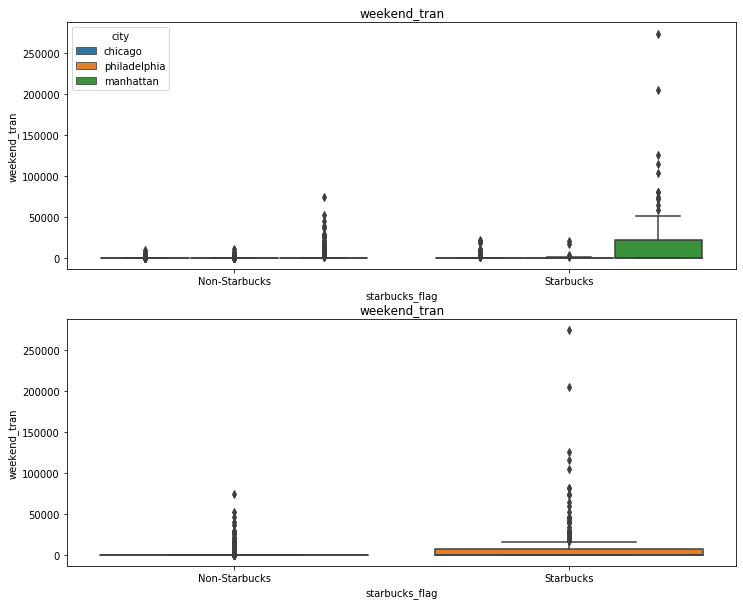

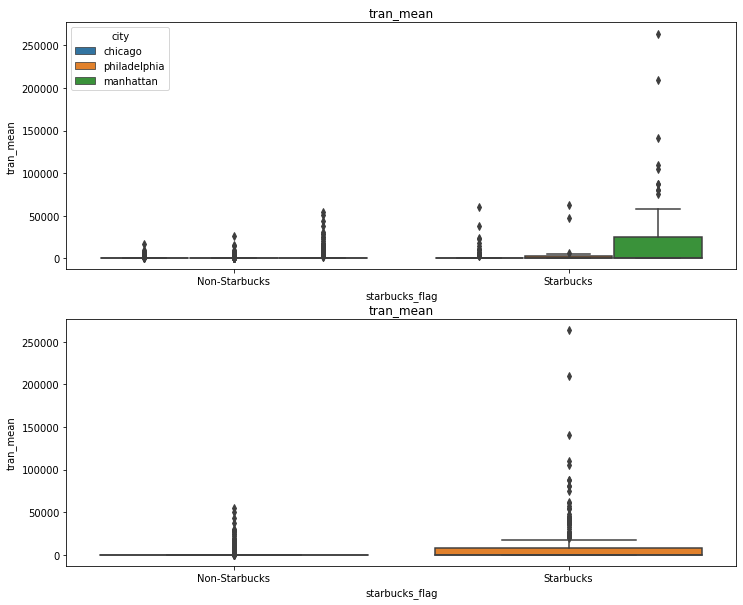

In [16]:
for i in col_list:
    box_plot(i)

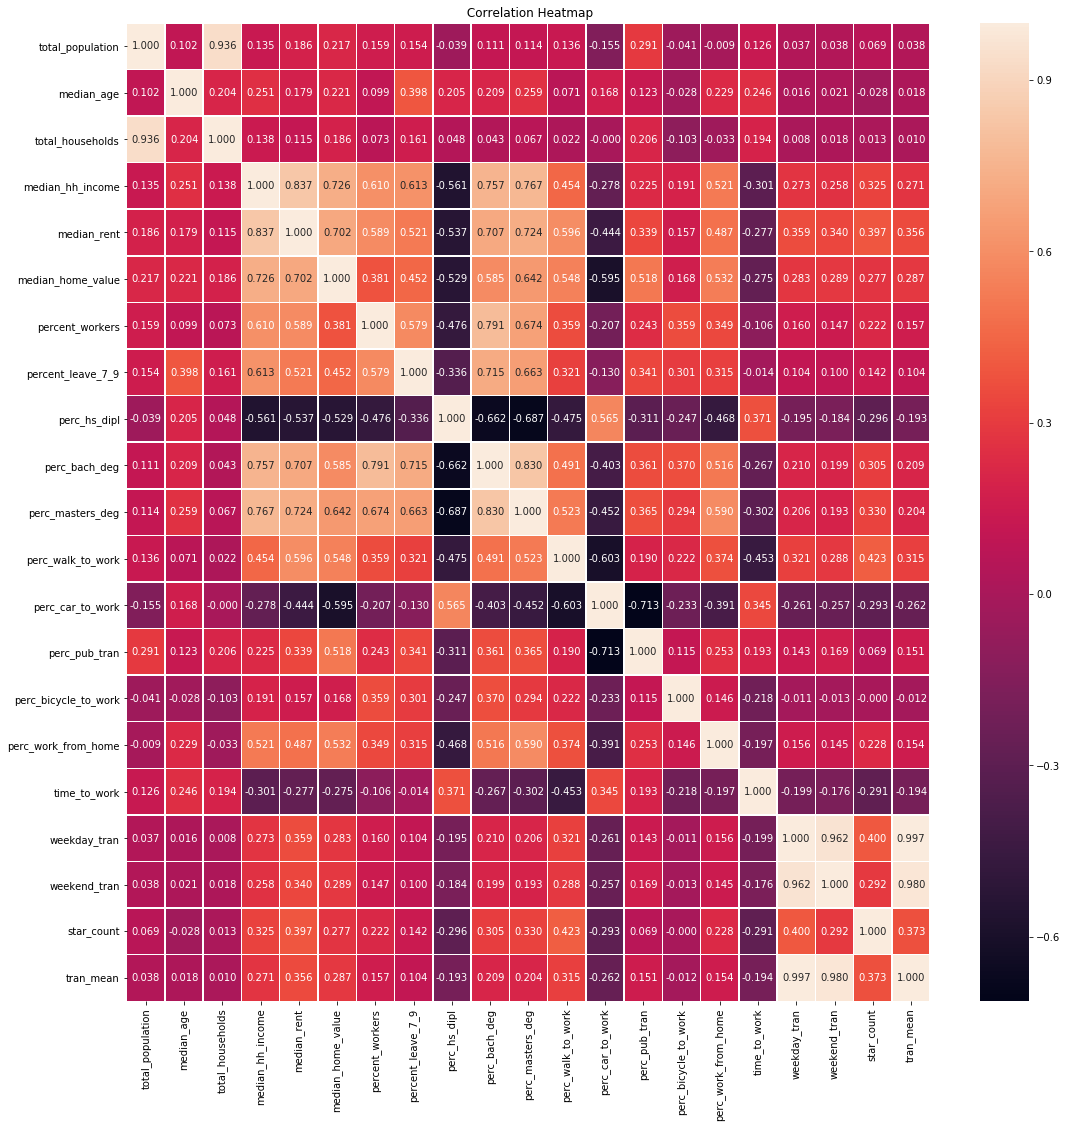

In [17]:
### Correlation plot
number = df[['total_population', 'median_age',
       'total_households', 'median_hh_income', 'median_rent',
       'median_home_value', 'percent_workers', 'percent_leave_7_9',
       'perc_hs_dipl', 'perc_bach_deg', 'perc_masters_deg',
       'perc_walk_to_work', 'perc_car_to_work', 'perc_pub_tran',
       'perc_bicycle_to_work', 'perc_work_from_home', 'time_to_work',
       'weekday_tran', 'weekend_tran','star_count','tran_mean']]
cor = number.corr()
f,ax = plt.subplots(figsize = (18,18))
plt.title(' Correlation Heatmap')
sns.heatmap(cor, annot = True, linewidths = .5, fmt='.3f', ax = ax)

### Train with manhattan and philadelphia, test on chicago

In [18]:
df1 = df.copy()
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
lc = LabelEncoder()
df1['class'] = lc.fit_transform(df1["starbucks_flag"])

In [19]:
cot = df1['class'].value_counts()
print(cot)
print('% non starbucks', cot[0]/cot.sum())
print('% starbucks', cot[1]/cot.sum())

0    1231
1     242
Name: class, dtype: int64
% non starbucks 0.8357094365241005
% starbucks 0.16429056347589951


In [20]:
df1.drop('total_households', inplace = True, axis = 1)

In [21]:
df1.head(2)

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class
0,17031010100,Census Tract 101,4444,33.70,33750,865.00,250000.00,0.55,0.52,0.10,...,0.03,0.06,35.93,0,0,0,Non-Starbucks,chicago,0.00,0
1,17031010201,Census Tract 102.01,7197,34.80,40841,989.00,150500.00,0.46,0.49,0.12,...,0.04,0.05,39.15,0,0,0,Non-Starbucks,chicago,0.00,0


In [22]:
test1 = df1[df1['city'] == 'chicago']
train1 = df1[df1['city'] != 'chicago']
train1['class'].value_counts()

0    522
1    150
Name: class, dtype: int64

In [23]:
# df_0 = train1[train1['class'] == 0]
# df_1 = train1[train1['class'] == 1]
# df_under = df_0.sample(300 ,random_state=19)
# train1 = pd.concat([df_under, df_1], axis = 0)
# train1['class'].value_counts()

In [24]:
train1.reset_index(inplace = True)
train1.drop('index', inplace = True, axis = 1)
train = train1.drop(['CT','tract_name', 'city','starbucks_flag','star_count','weekend_tran','weekday_tran'], axis = 1)
train.head()

,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,tran_mean,class
0,4155,30.90,109738,1724.00,397100.00,0.79,0.62,0.05,0.41,0.15,0.16,0.42,0.30,0.00,0.05,26.67,5965.00,1
1,2683,33.30,30746,1122.00,225800.00,0.57,0.58,0.16,0.20,0.03,0.35,0.28,0.20,0.02,0.01,26.92,151.00,0
2,3534,32.60,84135,1904.00,591200.00,0.68,0.61,0.06,0.29,0.14,0.45,0.24,0.13,0.01,0.08,21.86,2031.00,0
3,2632,33.90,59221,1435.00,595800.00,0.65,0.55,0.06,0.33,0.24,0.37,0.24,0.20,0.03,0.11,28.86,0.00,0
4,3299,52.40,72866,1751.00,303400.00,0.55,0.67,0.10,0.31,0.25,0.41,0.38,0.17,0.01,0.05,24.64,62317.00,1


In [25]:
test1.reset_index(inplace = True)
test1.drop('index', inplace = True, axis = 1)
test = test1.drop(['CT','tract_name', 'city','starbucks_flag','star_count','weekend_tran','weekday_tran'], axis = 1)
test.tail()

,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,tran_mean,class
796,2549,34.40,105408,1264.00,447300.00,0.55,0.50,0.09,0.20,0.11,0.02,0.54,0.29,0.03,0.08,35.51,0.00,1
797,1699,38.30,45833,1182.00,171500.00,0.46,0.39,0.30,0.04,0.01,0.06,0.64,0.08,0.00,0.04,30.37,0.00,0
798,3332,48.40,32750,963.00,112400.00,0.36,0.50,0.12,0.19,0.10,0.01,0.51,0.41,0.00,0.06,36.35,0.00,0
799,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10920.00,1
800,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7263.00,0


In [26]:
X_train = train.drop('class', axis = 1)
y_train = train[['class']]
X_test = test.drop('class', axis = 1)
y_test = test[['class']]

In [27]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [28]:
from sklearn.model_selection import GridSearchCV
log = LogisticRegression(random_state=0)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(log, hyperparameters, cv=5, verbose=1,n_jobs= -1,scoring = 'roc_auc' )
best_model = clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [29]:
print('Best Parameters:', best_model.best_params_)
print('Best Score:',best_model.best_score_)

Best Parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}
Best Score: 0.8642769928484215


In [30]:
log1 = LogisticRegression(C = 2.7825594022071245,penalty = 'l1' ,random_state=0)
log1.fit(X_train_scaled, y_train)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = log1.predict(X_train_scaled)
cm = confusion_matrix(y_train, pred)

accuracy: 0.8526785714285714


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

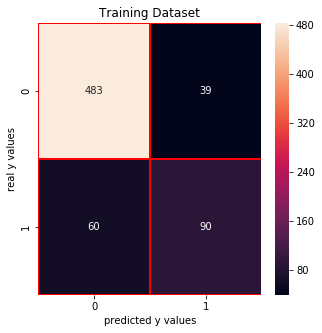

In [32]:
print('accuracy:', accuracy_score(y_train,pred))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Training Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.yticks( va="center")

accuracy: 0.9001248439450686


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

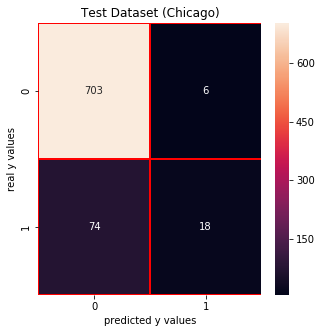

In [33]:
pred_chi = log1.predict(X_test_scaled)
cm_Chi = confusion_matrix(y_test, pred_chi)
print('accuracy:', accuracy_score(y_test,pred_chi))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_Chi, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset (Chicago)")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.yticks( va="center")

In [34]:
prob_chi = log1.predict_proba(X_test_scaled)
chi_prob = pd.DataFrame(prob_chi, columns = ['no_starbucks', 'starbucks'])
chi = pd.concat([test1, chi_prob] ,axis = 1)
chi.head()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks
0,17031010100,Census Tract 101,4444,33.70,33750,865.00,250000.00,0.55,0.52,0.10,...,35.93,0,0,0,Non-Starbucks,chicago,0.00,0,0.93,0.07
1,17031010201,Census Tract 102.01,7197,34.80,40841,989.00,150500.00,0.46,0.49,0.12,...,39.15,0,0,0,Non-Starbucks,chicago,0.00,0,0.96,0.04
2,17031010202,Census Tract 102.02,2487,36.70,36563,943.00,168300.00,0.49,0.50,0.11,...,31.48,5422,3307,0,Non-Starbucks,chicago,4818.00,0,0.94,0.06
3,17031010300,Census Tract 103,6413,42.10,36870,948.00,174400.00,0.51,0.47,0.18,...,40.19,1518,1066,0,Non-Starbucks,chicago,1389.00,0,0.95,0.05
4,17031010400,Census Tract 104,5411,23.80,39634,979.00,226200.00,0.61,0.32,0.06,...,33.60,0,0,0,Non-Starbucks,chicago,0.00,0,0.83,0.17


In [35]:
non_star = chi[chi['starbucks_flag'] == 'Non-Starbucks']
non_star2 = non_star[['CT', 'tract_name','no_starbucks', 'starbucks']]
max(non_star['starbucks'])

0.57812628458043

In [36]:
chi_top5 = non_star2.nlargest(5, ['starbucks'])
chi_top5

,CT,tract_name,no_starbucks,starbucks
127,17031080202,Census Tract 802.02,0.42,0.58
283,17031240500,Census Tract 2405,0.46,0.54
111,17031070300,Census Tract 703,0.48,0.52
116,17031071000,Census Tract 710,0.49,0.51
783,17031842300,Census Tract 8423,0.49,0.51


In [37]:
top5 = set(chi_top5['CT'])
res1 = test1[test1.CT.isin(top5)]
res1

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class
111,17031070300,Census Tract 703,3591,28.40,120139,1812.00,568500.00,0.77,0.66,0.03,...,0.01,0.03,29.88,0,0,0,Non-Starbucks,chicago,0.00,0
116,17031071000,Census Tract 710,4437,20.90,121840,1865.00,543600.00,0.71,0.40,0.01,...,0.01,0.06,22.01,0,0,0,Non-Starbucks,chicago,0.00,0
127,17031080202,Census Tract 802.02,3506,35.20,81794,1362.00,250300.00,0.66,0.62,0.02,...,0.02,0.10,25.57,7799,5488,0,Non-Starbucks,chicago,7139.00,0
283,17031240500,Census Tract 2405,2294,33.70,151369,2097.00,374100.00,0.83,0.65,0.04,...,0.01,0.07,30.16,0,0,0,Non-Starbucks,chicago,0.00,0
783,17031842300,Census Tract 8423,3189,33.30,123750,1734.00,556000.00,0.76,0.64,0.02,...,0.03,0.06,27.31,2847,1440,0,Non-Starbucks,chicago,2445.00,0


In [38]:
test1.groupby('city').mean()

,CT,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,...,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,tran_mean,class
city,,,,,,,,,,,,,,,,,,,,,
chicago,17031405356.47,3427.39,34.88,53895.28,1053.06,249933.96,0.50,0.44,0.14,0.15,...,0.53,0.26,0.01,0.04,35.09,725.55,365.39,0.22,622.64,0.11


In [39]:
chi['new_starbucks'] = np.where(chi['CT'].isin(res1['CT']),'New_location',chi['starbucks_flag'] )
chi['new_starbucks2'] = np.where(chi['CT'].isin(res1['CT']),chi['tract_name'],chi['starbucks_flag'] )
chi[chi['CT'].isin(res1['CT'])]

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks,new_starbucks,new_starbucks2
111,17031070300,Census Tract 703,3591,28.40,120139,1812.00,568500.00,0.77,0.66,0.03,...,0,0,Non-Starbucks,chicago,0.00,0,0.48,0.52,New_location,Census Tract 703
116,17031071000,Census Tract 710,4437,20.90,121840,1865.00,543600.00,0.71,0.40,0.01,...,0,0,Non-Starbucks,chicago,0.00,0,0.49,0.51,New_location,Census Tract 710
127,17031080202,Census Tract 802.02,3506,35.20,81794,1362.00,250300.00,0.66,0.62,0.02,...,5488,0,Non-Starbucks,chicago,7139.00,0,0.42,0.58,New_location,Census Tract 802.02
283,17031240500,Census Tract 2405,2294,33.70,151369,2097.00,374100.00,0.83,0.65,0.04,...,0,0,Non-Starbucks,chicago,0.00,0,0.46,0.54,New_location,Census Tract 2405
783,17031842300,Census Tract 8423,3189,33.30,123750,1734.00,556000.00,0.76,0.64,0.02,...,1440,0,Non-Starbucks,chicago,2445.00,0,0.49,0.51,New_location,Census Tract 8423


In [40]:
chi.to_csv('chi_prob.csv')
chi.head()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks,new_starbucks,new_starbucks2
0,17031010100,Census Tract 101,4444,33.70,33750,865.00,250000.00,0.55,0.52,0.10,...,0,0,Non-Starbucks,chicago,0.00,0,0.93,0.07,Non-Starbucks,Non-Starbucks
1,17031010201,Census Tract 102.01,7197,34.80,40841,989.00,150500.00,0.46,0.49,0.12,...,0,0,Non-Starbucks,chicago,0.00,0,0.96,0.04,Non-Starbucks,Non-Starbucks
2,17031010202,Census Tract 102.02,2487,36.70,36563,943.00,168300.00,0.49,0.50,0.11,...,3307,0,Non-Starbucks,chicago,4818.00,0,0.94,0.06,Non-Starbucks,Non-Starbucks
3,17031010300,Census Tract 103,6413,42.10,36870,948.00,174400.00,0.51,0.47,0.18,...,1066,0,Non-Starbucks,chicago,1389.00,0,0.95,0.05,Non-Starbucks,Non-Starbucks
4,17031010400,Census Tract 104,5411,23.80,39634,979.00,226200.00,0.61,0.32,0.06,...,0,0,Non-Starbucks,chicago,0.00,0,0.83,0.17,Non-Starbucks,Non-Starbucks


### Train with manhattan and chicago, test on philadelphia

In [41]:
test2 = df1[df1['city'] == 'philadelphia']
train2 = df1[df1['city'] != 'philadelphia']
print('Train')
print(train2['class'].value_counts())
print('Test')
print(test2['class'].value_counts())

Train
0    880
1    209
Name: class, dtype: int64
Test
0    351
1     33
Name: class, dtype: int64


In [42]:
train2.reset_index(inplace = True)
train2.drop('index', inplace = True, axis = 1)
train = train2.drop(['CT','tract_name', 'city','starbucks_flag','star_count','weekend_tran','weekday_tran'], axis = 1)
train.head()

,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,tran_mean,class
0,4444,33.70,33750,865.00,250000.00,0.55,0.52,0.10,0.14,0.07,0.03,0.31,0.50,0.03,0.06,35.93,0.00,0
1,7197,34.80,40841,989.00,150500.00,0.46,0.49,0.12,0.15,0.06,0.01,0.51,0.30,0.04,0.05,39.15,0.00,0
2,2487,36.70,36563,943.00,168300.00,0.49,0.50,0.11,0.15,0.05,0.01,0.47,0.42,0.03,0.04,31.48,4818.00,0
3,6413,42.10,36870,948.00,174400.00,0.51,0.47,0.18,0.14,0.10,0.03,0.48,0.37,0.01,0.06,40.19,1389.00,0
4,5411,23.80,39634,979.00,226200.00,0.61,0.32,0.06,0.17,0.11,0.14,0.19,0.34,0.03,0.08,33.60,0.00,0


In [43]:
test2.reset_index(inplace = True)
test2.drop('index', inplace = True, axis = 1)
test = test2.drop(['CT','tract_name', 'city','starbucks_flag','star_count','weekend_tran','weekday_tran'], axis = 1)
test.head()

,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,tran_mean,class
0,4155,30.90,109738,1724.00,397100.00,0.79,0.62,0.05,0.41,0.15,0.16,0.42,0.30,0.00,0.05,26.67,5965.00,1
1,2683,33.30,30746,1122.00,225800.00,0.57,0.58,0.16,0.20,0.03,0.35,0.28,0.20,0.02,0.01,26.92,151.00,0
2,3534,32.60,84135,1904.00,591200.00,0.68,0.61,0.06,0.29,0.14,0.45,0.24,0.13,0.01,0.08,21.86,2031.00,0
3,2632,33.90,59221,1435.00,595800.00,0.65,0.55,0.06,0.33,0.24,0.37,0.24,0.20,0.03,0.11,28.86,0.00,0
4,3299,52.40,72866,1751.00,303400.00,0.55,0.67,0.10,0.31,0.25,0.41,0.38,0.17,0.01,0.05,24.64,62317.00,1


In [44]:
X_train = train.drop('class', axis = 1)
y_train = train[['class']]
X_test = test.drop('class', axis = 1)
y_test = test[['class']]

In [45]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [46]:
log22 = LogisticRegression(random_state=0)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(log22, hyperparameters, cv=5, verbose=1,n_jobs= -1,scoring = 'roc_auc' )
best_model = clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [47]:
print('Best Parameters:', best_model.best_params_)
print('Best Score:',best_model.best_score_)

Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Best Score: 0.8596599956330858


In [48]:
log2 = LogisticRegression(C = 1.0,penalty = 'l2' ,random_state=0)
log2.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy: 0.869605142332415


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

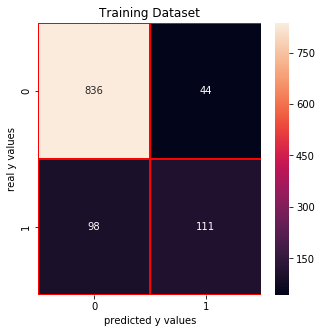

In [49]:
pred2 = log2.predict(X_train_scaled)
cm2 = confusion_matrix(y_train, pred2)
print('accuracy:', accuracy_score(y_train,pred2))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm2, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Training Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.yticks( va="center")

accuracy: 0.9140625


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

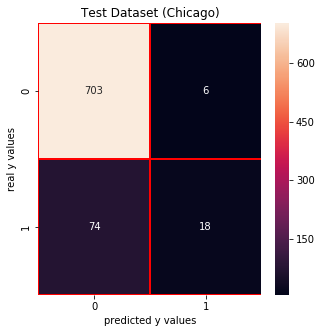

In [50]:
pred_phi = log2.predict(X_test_scaled)
cm_phi = confusion_matrix(y_test, pred_phi)
print('accuracy:', accuracy_score(y_test,pred_phi))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_Chi, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset (Chicago)")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.yticks( va="center")

In [51]:
prob_phi = log2.predict_proba(X_test_scaled)
phi_prob = pd.DataFrame(prob_phi, columns = ['no_starbucks', 'starbucks'])
phi = pd.concat([test2, phi_prob] ,axis = 1)
phi.head()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks
0,42101000100,Census Tract 1,4155,30.90,109738,1724.00,397100.00,0.79,0.62,0.05,...,26.67,6913,3595,1,Starbucks,philadelphia,5965.00,1,0.44,0.56
1,42101000200,Census Tract 2,2683,33.30,30746,1122.00,225800.00,0.57,0.58,0.16,...,26.92,207,10,0,Non-Starbucks,philadelphia,151.00,0,0.85,0.15
2,42101000300,Census Tract 3,3534,32.60,84135,1904.00,591200.00,0.68,0.61,0.06,...,21.86,2573,676,0,Non-Starbucks,philadelphia,2031.00,0,0.40,0.60
3,42101000401,Census Tract 4.01,2632,33.90,59221,1435.00,595800.00,0.65,0.55,0.06,...,28.86,0,0,0,Non-Starbucks,philadelphia,0.00,0,0.44,0.56
4,42101000402,Census Tract 4.02,3299,52.40,72866,1751.00,303400.00,0.55,0.67,0.10,...,24.64,80129,17787,6,Starbucks,philadelphia,62317.00,1,0.42,0.58


In [52]:
non_star = phi[phi['starbucks_flag'] == 'Non-Starbucks']
non_star2 = non_star[['CT', 'tract_name','no_starbucks', 'starbucks']]
max(non_star['starbucks'])

0.6303072106304852

In [53]:
phi_top5 = non_star2.nlargest(5, ['starbucks'])
phi_top5

,CT,tract_name,no_starbucks,starbucks
8,42101000801,Census Tract 8.01,0.37,0.63
2,42101000300,Census Tract 3,0.40,0.60
18,42101001202,Census Tract 12.02,0.41,0.59
3,42101000401,Census Tract 4.01,0.44,0.56
11,42101000901,Census Tract 9.01,0.45,0.55


In [54]:
p_top5 = set(phi_top5['CT'])
res2 = test2[test2.CT.isin(p_top5)]
res2.head()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class
2,42101000300,Census Tract 3,3534,32.60,84135,1904.00,591200.00,0.68,0.61,0.06,...,0.01,0.08,21.86,2573,676,0,Non-Starbucks,philadelphia,2031.00,0
3,42101000401,Census Tract 4.01,2632,33.90,59221,1435.00,595800.00,0.65,0.55,0.06,...,0.03,0.11,28.86,0,0,0,Non-Starbucks,philadelphia,0.00,0
8,42101000801,Census Tract 8.01,1407,28.90,94821,1955.00,659400.00,0.72,0.56,0.02,...,0.05,0.04,24.16,0,0,0,Non-Starbucks,philadelphia,0.00,0
11,42101000901,Census Tract 9.01,1949,30.20,42548,1136.00,257400.00,0.74,0.56,0.04,...,0.06,0.02,20.81,6804,3647,0,Non-Starbucks,philadelphia,5902.00,0
18,42101001202,Census Tract 12.02,5080,32.00,77150,1450.00,657700.00,0.71,0.54,0.02,...,0.06,0.10,24.40,0,0,0,Non-Starbucks,philadelphia,0.00,0


In [55]:
test2.groupby('city').mean()

,CT,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,...,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,tran_mean,class
city,,,,,,,,,,,,,,,,,,,,,
philadelphia,42101047178.58,4087.65,34.90,43391.35,988.52,183069.01,0.45,0.45,0.19,0.11,...,0.52,0.24,0.02,0.03,32.13,1054.27,396.95,0.12,866.47,0.09


In [56]:
phi['new_starbucks'] = np.where(phi['CT'].isin(res2['CT']),'New_location',phi['starbucks_flag'] )
phi['new_starbucks2'] = np.where(phi['CT'].isin(res2['CT']),phi['tract_name'],phi['starbucks_flag'] )
phi[phi['CT'].isin(res2['CT'])]

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks,new_starbucks,new_starbucks2
2,42101000300,Census Tract 3,3534,32.60,84135,1904.00,591200.00,0.68,0.61,0.06,...,676,0,Non-Starbucks,philadelphia,2031.00,0,0.40,0.60,New_location,Census Tract 3
3,42101000401,Census Tract 4.01,2632,33.90,59221,1435.00,595800.00,0.65,0.55,0.06,...,0,0,Non-Starbucks,philadelphia,0.00,0,0.44,0.56,New_location,Census Tract 4.01
8,42101000801,Census Tract 8.01,1407,28.90,94821,1955.00,659400.00,0.72,0.56,0.02,...,0,0,Non-Starbucks,philadelphia,0.00,0,0.37,0.63,New_location,Census Tract 8.01
11,42101000901,Census Tract 9.01,1949,30.20,42548,1136.00,257400.00,0.74,0.56,0.04,...,3647,0,Non-Starbucks,philadelphia,5902.00,0,0.45,0.55,New_location,Census Tract 9.01
18,42101001202,Census Tract 12.02,5080,32.00,77150,1450.00,657700.00,0.71,0.54,0.02,...,0,0,Non-Starbucks,philadelphia,0.00,0,0.41,0.59,New_location,Census Tract 12.02


In [57]:
phi.to_csv('phi_prob.csv')
phi.head()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks,new_starbucks,new_starbucks2
0,42101000100,Census Tract 1,4155,30.90,109738,1724.00,397100.00,0.79,0.62,0.05,...,3595,1,Starbucks,philadelphia,5965.00,1,0.44,0.56,Starbucks,Starbucks
1,42101000200,Census Tract 2,2683,33.30,30746,1122.00,225800.00,0.57,0.58,0.16,...,10,0,Non-Starbucks,philadelphia,151.00,0,0.85,0.15,Non-Starbucks,Non-Starbucks
2,42101000300,Census Tract 3,3534,32.60,84135,1904.00,591200.00,0.68,0.61,0.06,...,676,0,Non-Starbucks,philadelphia,2031.00,0,0.40,0.60,New_location,Census Tract 3
3,42101000401,Census Tract 4.01,2632,33.90,59221,1435.00,595800.00,0.65,0.55,0.06,...,0,0,Non-Starbucks,philadelphia,0.00,0,0.44,0.56,New_location,Census Tract 4.01
4,42101000402,Census Tract 4.02,3299,52.40,72866,1751.00,303400.00,0.55,0.67,0.10,...,17787,6,Starbucks,philadelphia,62317.00,1,0.42,0.58,Starbucks,Starbucks


### Train with philadelphia and chicago, test on manhattan

In [58]:
test3 = df1[df1['city'] == 'manhattan']
train3 = df1[df1['city'] != 'manhattan']
print('Train')
print(train3['class'].value_counts())
print('Test')
print(test3['class'].value_counts())

Train
0    1060
1     125
Name: class, dtype: int64
Test
0    171
1    117
Name: class, dtype: int64


In [59]:
train3.reset_index(inplace = True)
train3.drop('index', inplace = True, axis = 1)
train = train3.drop(['CT','tract_name', 'city','starbucks_flag','star_count','weekend_tran','weekday_tran'], axis = 1)
train.tail()

,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,tran_mean,class
1180,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2741.00,0
1181,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1182,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1702.00,0
1183,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1184,2536,30.20,0,954.00,149900.00,0.40,0.01,0.19,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0


In [60]:
test3.reset_index(inplace = True)
test3.drop('index', inplace = True, axis = 1)
test = test3.drop(['CT','tract_name', 'city','starbucks_flag','star_count','weekend_tran','weekday_tran'], axis = 1)
test.tail()

,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,perc_masters_deg,perc_walk_to_work,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,tran_mean,class
283,10137,34.80,31549,1046.00,626100.00,0.45,0.43,0.16,0.12,0.02,0.09,0.17,0.59,0.02,0.03,43.24,5474.00,0
284,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
285,5644,35.30,250001,2962.00,2000001.00,0.55,0.63,0.05,0.32,0.19,0.31,0.05,0.42,0.04,0.06,23.63,0.00,1
286,10241,38.20,162030,3177.00,965500.00,0.64,0.61,0.01,0.33,0.21,0.27,0.09,0.50,0.02,0.06,31.12,0.00,1
287,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [61]:
X_train = train.drop('class', axis = 1)
y_train = train[['class']]
X_test = test.drop('class', axis = 1)
y_test = test[['class']]

In [62]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [63]:
log33 = LogisticRegression(random_state=0)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(log33, hyperparameters, cv=5, verbose=1,n_jobs= -1,scoring = 'roc_auc' )
best_model = clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [64]:
print('Best Parameters:', best_model.best_params_)
print('Best Score:',best_model.best_score_)

Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Best Score: 0.8348301886792453


In [65]:
log3 = LogisticRegression(C = 1.0,penalty = 'l2' ,random_state=0)
log3.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy: 0.909704641350211


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

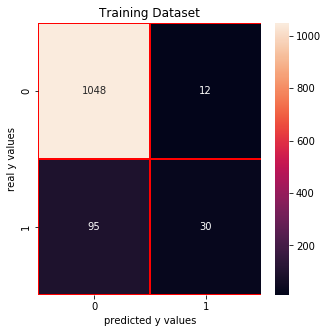

In [66]:
pred3 = log3.predict(X_train_scaled)
cm3 = confusion_matrix(y_train, pred3)
print('accuracy:', accuracy_score(y_train,pred3))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm3, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Training Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.yticks( va="center")

accuracy: 0.7569444444444444


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

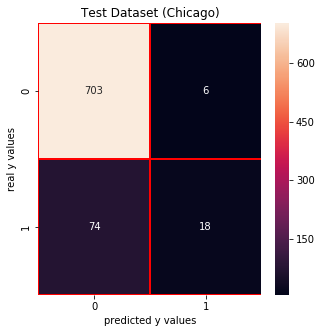

In [67]:
pred_man  = log3.predict(X_test_scaled)
cm_man = confusion_matrix(y_test, pred_man)
print('accuracy:', accuracy_score(y_test,pred_man))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_Chi, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Test Dataset (Chicago)")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.yticks( va="center")

In [68]:
prob_man = log3.predict_proba(X_test_scaled)
man_prob = pd.DataFrame(prob_man, columns = ['no_starbucks', 'starbucks'])
man = pd.concat([test3, man_prob] ,axis = 1)
man.head()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks
0,36061000100,Census Tract 1,0,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,Non-Starbucks,manhattan,0.00,0,0.77,0.23
1,36061000201,Census Tract 2.01,2730,36.80,23574,627.00,864800.00,0.36,0.43,0.15,...,38.19,0,0,0,Non-Starbucks,manhattan,0.00,0,0.95,0.05
2,36061000202,Census Tract 2.02,7789,45.70,32068,702.00,569700.00,0.35,0.60,0.14,...,36.03,0,0,0,Non-Starbucks,manhattan,0.00,0,0.91,0.09
3,36061000500,Census Tract 5,0,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,Non-Starbucks,manhattan,0.00,0,0.77,0.23
4,36061000600,Census Tract 6,10890,48.20,19778,655.00,602400.00,0.34,0.53,0.09,...,30.21,13868,12494,0,Non-Starbucks,manhattan,13475.00,0,0.75,0.25


In [69]:
non_star = man[man['starbucks_flag'] == 'Non-Starbucks']
non_star2 = non_star[['CT', 'tract_name','no_starbucks', 'starbucks']]
max(non_star['starbucks'])

0.8650582786416698

In [70]:
man_top5 = non_star2.nlargest(5, ['starbucks'])
man_top5

,CT,tract_name,no_starbucks,starbucks
76,36061007800,Census Tract 78,0.13,0.87
126,36061012600,Census Tract 126,0.18,0.82
85,36061008603,Census Tract 86.03,0.21,0.79
53,36061005502,Census Tract 55.02,0.23,0.77
106,36061010800,Census Tract 108,0.23,0.77


In [71]:
m_top5 = set(man_top5['CT'])
res3 = test3.loc[test3.CT.isin(m_top5)]
res3

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,starbucks_flag,city,tran_mean,class
53,36061005502,Census Tract 55.02,2245,37.70,127465,2422.00,1602000.00,0.60,0.55,0.04,...,0.01,0.10,26.24,36493,39512,0,Non-Starbucks,manhattan,37356.00,0
76,36061007800,Census Tract 78,8610,31.30,118866,2647.00,701100.00,0.68,0.58,0.03,...,0.00,0.05,28.20,0,0,0,Non-Starbucks,manhattan,0.00,0
85,36061008603,Census Tract 86.03,4772,57.60,167607,2927.00,1042900.00,0.44,0.71,0.04,...,0.01,0.11,25.47,0,0,0,Non-Starbucks,manhattan,0.00,0
106,36061010800,Census Tract 108,9084,38.90,144881,2272.00,785600.00,0.61,0.74,0.02,...,0.00,0.09,27.93,0,0,0,Non-Starbucks,manhattan,0.00,0
126,36061012600,Census Tract 126,12920,38.40,133878,2085.00,1004000.00,0.57,0.65,0.03,...,0.02,0.09,34.64,30253,25320,0,Non-Starbucks,manhattan,28844.00,0


In [72]:
test3.groupby('city').mean()

,CT,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,perc_bach_deg,...,perc_car_to_work,perc_pub_tran,perc_bicycle_to_work,perc_work_from_home,time_to_work,weekday_tran,weekend_tran,star_count,tran_mean,class
city,,,,,,,,,,,,,,,,,,,,,
manhattan,36061014288.56,5742.63,37.38,90068.07,1790.39,923618.83,0.54,0.52,0.08,0.24,...,0.07,0.54,0.02,0.07,30.35,10346.18,10108.90,0.79,10278.38,0.41


In [73]:
man['new_starbucks'] = np.where(man['CT'].isin(res3['CT']),'New_location',man['starbucks_flag'] )
man['new_starbucks2'] = np.where(man['CT'].isin(res3['CT']),man['tract_name'],man['starbucks_flag'] )
man[man['CT'].isin(res3['CT'])]

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks,new_starbucks,new_starbucks2
53,36061005502,Census Tract 55.02,2245,37.70,127465,2422.00,1602000.00,0.60,0.55,0.04,...,39512,0,Non-Starbucks,manhattan,37356.00,0,0.23,0.77,New_location,Census Tract 55.02
76,36061007800,Census Tract 78,8610,31.30,118866,2647.00,701100.00,0.68,0.58,0.03,...,0,0,Non-Starbucks,manhattan,0.00,0,0.13,0.87,New_location,Census Tract 78
85,36061008603,Census Tract 86.03,4772,57.60,167607,2927.00,1042900.00,0.44,0.71,0.04,...,0,0,Non-Starbucks,manhattan,0.00,0,0.21,0.79,New_location,Census Tract 86.03
106,36061010800,Census Tract 108,9084,38.90,144881,2272.00,785600.00,0.61,0.74,0.02,...,0,0,Non-Starbucks,manhattan,0.00,0,0.23,0.77,New_location,Census Tract 108
126,36061012600,Census Tract 126,12920,38.40,133878,2085.00,1004000.00,0.57,0.65,0.03,...,25320,0,Non-Starbucks,manhattan,28844.00,0,0.18,0.82,New_location,Census Tract 126


In [74]:
man.to_csv('man_prob.csv')
man.tail()

,CT,tract_name,total_population,median_age,median_hh_income,median_rent,median_home_value,percent_workers,percent_leave_7_9,perc_hs_dipl,...,weekend_tran,star_count,starbucks_flag,city,tran_mean,class,no_starbucks,starbucks,new_starbucks,new_starbucks2
283,36061030900,Census Tract 309,10137,34.80,31549,1046.00,626100.00,0.45,0.43,0.16,...,5578,0,Non-Starbucks,manhattan,5474.00,0,0.91,0.09,Non-Starbucks,Non-Starbucks
284,36061031100,Census Tract 311,0,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0,0,Non-Starbucks,manhattan,0.00,0,0.77,0.23,Non-Starbucks,Non-Starbucks
285,36061031703,Census Tract 317.03,5644,35.30,250001,2962.00,2000001.00,0.55,0.63,0.05,...,0,1,Starbucks,manhattan,0.00,1,0.22,0.78,Starbucks,Starbucks
286,36061031704,Census Tract 317.04,10241,38.20,162030,3177.00,965500.00,0.64,0.61,0.01,...,0,1,Starbucks,manhattan,0.00,1,0.24,0.76,Starbucks,Starbucks
287,36061031900,Census Tract 319,0,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0,0,Non-Starbucks,manhattan,0.00,0,0.77,0.23,Non-Starbucks,Non-Starbucks
